## | - Nettoyage des données

### 1) Import Biblio Python & data

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import pearsonr, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as ss
import scipy.stats as stats

In [12]:
df = pd.read_csv("bronze.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.shape

(7043, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
profile = ProfileReport(df, title="Profiling Report")

In [17]:
#profile.to_file('Churn_data_report.html')
#the open with live server (click droit)

### 2) Suppression des doublons

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [25]:
df = df.drop_duplicates()

### 3) Conversion des types

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [52]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 4) Traitement des valeurs manquantes

In [21]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# par une valeur statistiquement plausible
df["TotalCharges"] = df["TotalCharges"].fillna(int(df["TotalCharges"].median()))

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 5) Consistance des données (valeurs aberrantes, fautes orthographes…)

In [44]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

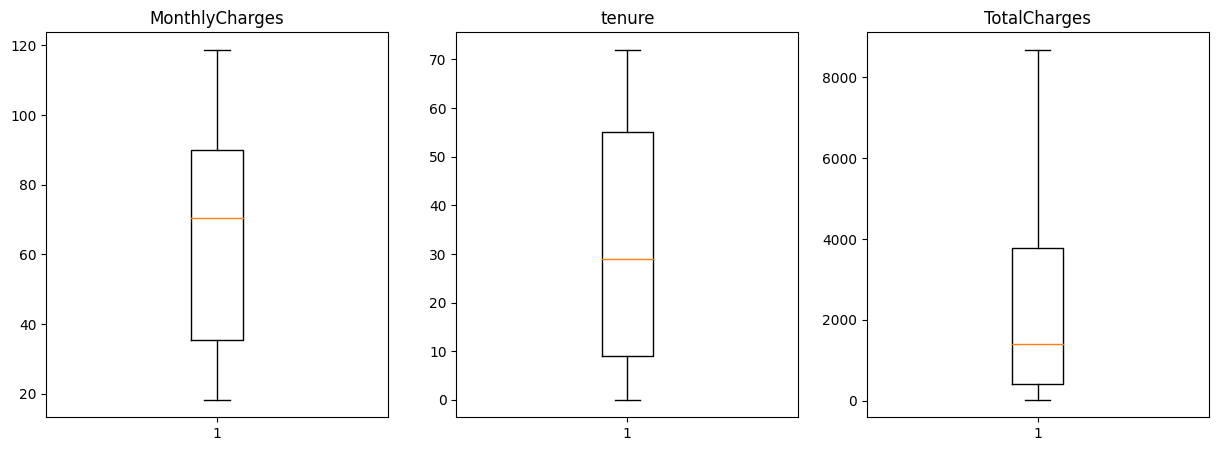

In [50]:
# Création des boxplots pour trois variables
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
variables = ['MonthlyCharges', 'tenure' ,'TotalCharges']
for i, variable in enumerate(variables):
    axs[i].boxplot(df[variable].dropna())
    axs[i].set_title(variable)

plt.show()

In [24]:
#EXporter la data dans un Csv 
#df.to_csv('silver.csv', index=False)

## || - Analyse des Données

### 1) Indicateurs Statistiques 

In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916186
std,0.368612,24.559481,30.090047,2265.270688
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.000000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### 2) Corrélations entre les variables

##### <font color="yellow">! Test khi-deux => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [63]:
# Effectuer le test du chi-deux pour les variables catégorielles (gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod et Churn)
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for var in categorical_variables:
    contingency_table = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("P-value du Test du chi-deux pour la variable", var, ":", p)
  

P-value du Test du chi-deux pour la variable gender : 0.48657873605618596
P-value du Test du chi-deux pour la variable SeniorCitizen : 1.510066805092378e-36
P-value du Test du chi-deux pour la variable Partner : 2.1399113440759935e-36
P-value du Test du chi-deux pour la variable Dependents : 4.9249216612154196e-43
P-value du Test du chi-deux pour la variable PhoneService : 0.3387825358066928
P-value du Test du chi-deux pour la variable MultipleLines : 0.0034643829548773
P-value du Test du chi-deux pour la variable InternetService : 9.571788222840544e-160
P-value du Test du chi-deux pour la variable OnlineSecurity : 2.661149635176552e-185
P-value du Test du chi-deux pour la variable OnlineBackup : 2.0797592160864276e-131
P-value du Test du chi-deux pour la variable DeviceProtection : 5.505219496457244e-122
P-value du Test du chi-deux pour la variable TechSupport : 1.4430840279998987e-180
P-value du Test du chi-deux pour la variable StreamingTV : 5.528994485739183e-82
P-value du Test du 

##### <font color="yellow">! Test Fisher => H0 : l’hypothèse nulle est : « les deux variables testées sont indépendantes » ( si p-value < 5% on rejette H0)</font>

In [60]:
# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue MonthlyCharges
model = ols('MonthlyCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue TotalCharges
model = ols('TotalCharges ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Effectuer une ANOVA pour la variable catégorique Churn et la variable continue tenure
model = ols('tenure ~ Churn', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
Churn     2.383740e+05     1.0  273.463704  2.706646e-60
Residual  6.137530e+06  7041.0         NaN           NaN
                sum_sq      df           F        PR(>F)
Churn     1.431536e+09     1.0  290.439155  7.511054e-64
Residual  3.470414e+10  7041.0         NaN           NaN
                sum_sq      df          F         PR(>F)
Churn     5.269675e+05     1.0  997.26801  7.999058e-205
Residual  3.720542e+06  7041.0        NaN            NaN


- Le coefficient de corrélation de rang de Spearman mesure la corrélation entre deux variables ordinales ou continues.  
Il est également compris entre -1 et 1, où une valeur de -1 indique une corrélation négative parfaite,  
une valeur de 0 indique l'absence de corrélation et une valeur de 1 indique une corrélation positive parfaite  

In [89]:
# Calcul du coefficient de corrélation de rang de Spearman entre Churn et MonthlyCharges
corr, p_value = stats.spearmanr(df['Churn'], df['MonthlyCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et TotalCharges
corr, p_value = stats.spearmanr(df['Churn'], df['TotalCharges'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)

# Calcul du coefficient de corrélation de rang de Spearman entre Churn et tenure
corr, p_value = stats.spearmanr(df['Churn'], df['tenure'])
print('Coefficient de corrélation de rang de Spearman :', corr)
print('p-value :', p_value)


Coefficient de corrélation de rang de Spearman : 0.18474274666624488
p-value : 4.132385749669143e-55
Coefficient de corrélation de rang de Spearman : -0.23205871805614775
p-value : 9.474863535137858e-87
Coefficient de corrélation de rang de Spearman : -0.3670618566861082
p-value : 1.404616769950862e-223


##### <font color="yellow"> Conclusion Tests : </font>

- ON constate que les variables (MonthlyCharges, TotalCharges, tenure, SeniorCitizen,Partner,Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup , DeviceProtection , TechSupport , StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod ) ont une influence sur notre Target variable Churn

In [65]:
def cramers_v(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [66]:
cramers_v(df['Churn'], df['InternetService'])

0.3220367323307425

In [71]:
cramers_v(df['Churn'], df['SeniorCitizen'])

0.14999108255137

In [72]:
cramers_v(df['Churn'], df['Partner'])

0.14966271044155077

In [73]:
cramers_v(df['Churn'], df['Dependents'])

0.1634481432749282

In [74]:
cramers_v(df['Churn'], df['MultipleLines'])

0.03639958908232507

In [75]:
cramers_v(df['Churn'], df['OnlineSecurity'])

0.3470160668827287

In [76]:
cramers_v(df['Churn'], df['OnlineBackup'])

0.291850036724674

In [77]:
cramers_v(df['Churn'], df['DeviceProtection'])

0.28109492388964397

In [78]:
cramers_v(df['Churn'], df['TechSupport'])

0.3425261587493694

In [79]:
cramers_v(df['Churn'], df['StreamingTV'])

0.22990176915403476

In [80]:
cramers_v(df['Churn'], df['StreamingMovies'])

0.23035147282444215

In [81]:
cramers_v(df['Churn'], df['Contract'])

0.40979839182553446

In [82]:
cramers_v(df['Churn'], df['PaperlessBilling'])

0.1911405817441778

In [83]:
cramers_v(df['Churn'], df['PaymentMethod'])

0.3026771381187204